# 부정보험청구 탐지 실습

## 데이터셋

- 미국 보험금 부정청구 데이터
- 1000개 데이터
- 39개 칼럼

In [13]:
import pandas as pd 
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/fintech-data/Revolution2/main/data/insurance_claims.csv")

- months_as_customer : int 보험금 납입 기간(누적, 개월)
- age	: int 연령
- policy_number :  int 보험 가입번호
- policy_bind_date : str 보험 계약일
- policy_state : str 보험 계약자 주
- policy_csl : 보험한도  : str 사고 발생 시 1인당 보험금 한도액 / 전체 보험금 한도액 (단위 :  천달러)
- policy_deductable :  int 보험의 자기부담금
- policy_annual_premium	: float 연간보험료
- umbrella_limit	: int 보험금 한도
- insured_zip : int피보험자 우편번호
- insured_sex  : str피보험자  성별
- insured_education_level	:str   피보험자  교육수준
- insured_occupation	insured_hobbies :str  피보험자의 취미
- insured_relationship :str 피보험자 와 보험계약자의 관계
- capital-gains : int 자본이득
- capital-loss :  int 자본손실
- incident_date	: str 보험 사고 일자
- incident_type	: str 보험 사고의 종류
- collision_type	: str 충돌 유형
- incident_severity : str 손상정도
- authorities_contacted :  str 보험사고 발생 당시 연락기관(경찰서, 소방서 등)
- incident_state :  str 사고 발생 지역
- incident_city : 	str 사고 발생 도시
- incident_location : 	str 사고 발생 위치
- incident_hour_of_the_day : int  사고 발생 시각 (예: 20시 경)
- number_of_vehicles_involved	: int  총 사고 발생 차량 수
- property_damage : str  재산 피해 여부
- bodily_injuries	: int  신체 피해 정도( 0 : 없음, 1: 경상 2: 중상)
- witnesses	: int  사고 목격자 수
- police_report_available : str  	경찰 보고서 확인 가능 여부
- total_claim_amount : int  총 보험금 청구금액
- injury_claim : int  상해 청구금액
- property_claim :int  재산 피해 청구 금액
- vehicle_claim :int  차량 피해 청구금액
- auto_make :str  자동차 제조사
- auto_model :str  자동차 모델
- auto_year :int  자동차 연식
- fraud_reported :str  허위 청구여부 (허위청구 :  Y / 정상청구 : N)

## EDA (탐색적 데이터 분석)

### 데이터 확인

- 데이터 일부 확인 (전치)

In [14]:
pd.set_option('display.max_columns',None)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


- 데이터 행, 열 개수 확인

In [15]:
df.shape

(1000, 39)

- 칼럼 목록, 데이터타입 확인

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [17]:
columns_list = df.columns
for columns in columns_list:
    if df[columns].dtype == object:
        print(columns)
        print(df[columns].value_counts(),'\n')

policy_bind_date
2006-01-01    3
1992-04-28    3
1992-08-05    3
1991-12-14    2
2004-08-09    2
             ..
2014-06-03    1
1998-12-12    1
1999-02-18    1
1997-10-30    1
1996-11-11    1
Name: policy_bind_date, Length: 951, dtype: int64 

policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64 

policy_csl
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64 

insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64 

insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64 

insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
h

- 종속변수(y) 별 데이터 비율 확인

<AxesSubplot: xlabel='fraud_reported', ylabel='count'>

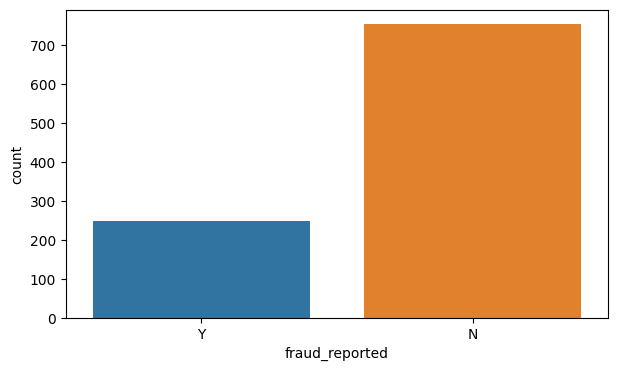

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig =plt.figure(figsize=(7,4))

sns.countplot(data=df ,x='fraud_reported')

- 결측값 확인 (칼럼 별 결측값 개수, 퍼센티지 확인)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

- 문자열로 된 데이터에 대하여 LabelEncoding 적용

In [20]:
numeric_cols = []
object_cols = []

for c in df:
    if df[c].dtype == 'object':
        object_cols.append(c)
    else:
        numeric_cols.append(c)

In [21]:
from sklearn.preprocessing import LabelEncoder

def object_to_int(dataframe_series):
    encoder = LabelEncoder()
    encoder.fit(dataframe_series)
    labels = encoder.transform(dataframe_series)

    return labels

In [22]:
for object_col in object_cols:
    df[object_col]= object_to_int(df[object_col])

In [23]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,940,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,24,2,3,0,4,4,1,996,5,1,2,1,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,635,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,20,3,0,1,4,5,5,628,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,413,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,52,0,2,1,4,1,1,685,7,3,1,2,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,19,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,9,2,1,0,4,2,0,669,5,1,0,1,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,922,0,2,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,47,3,0,1,2,1,0,220,20,1,1,0,1,1,6500,1300,650,4550,0,31,2009,0


### plotting

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

C:\Users\seon\AppData\Local\Temp\ipykernel_16964\3330901477.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(frame[feature], color= color)
C:\Users\seon\AppData\Local\Temp\ipykernel_16964\3330901477.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(frame[feature], color= color)
C:

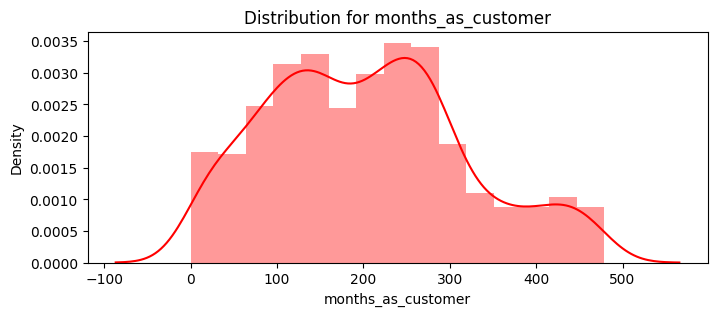

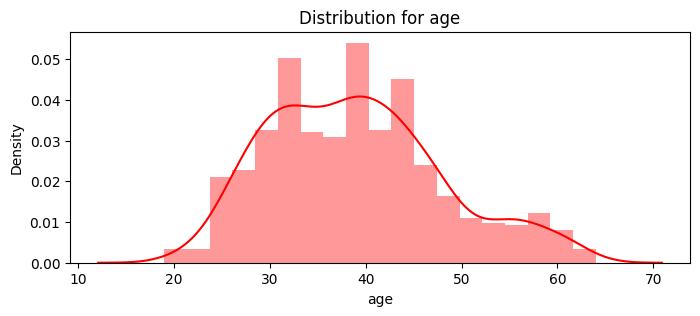

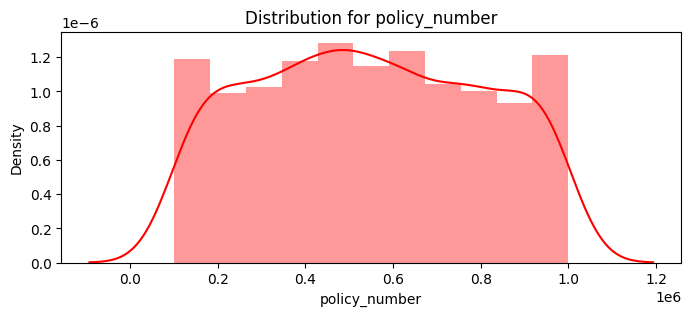

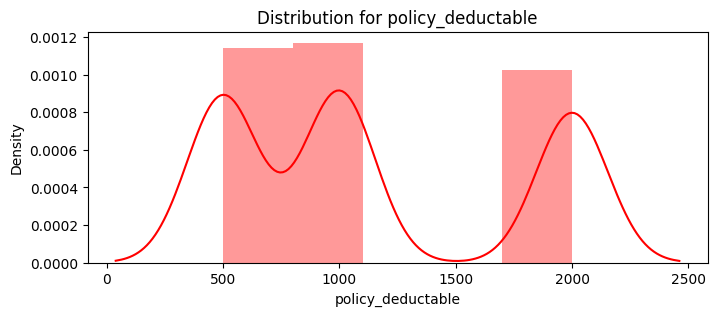

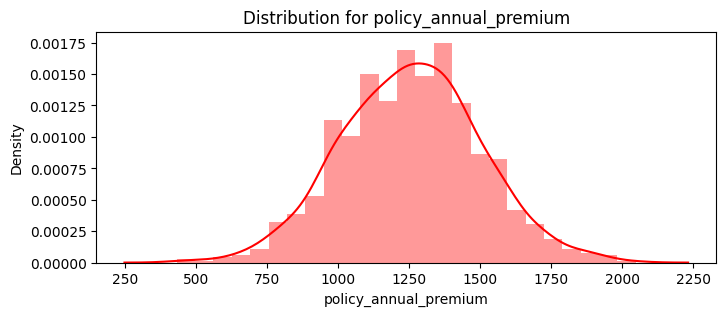

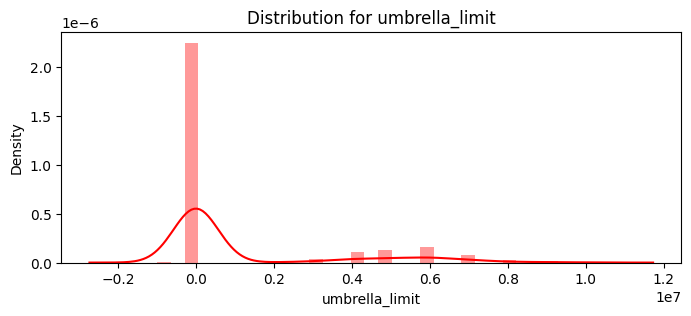

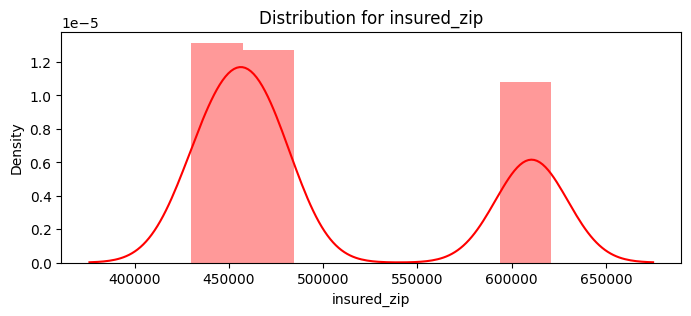

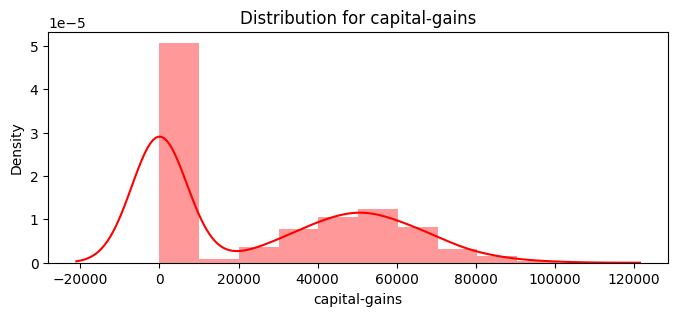

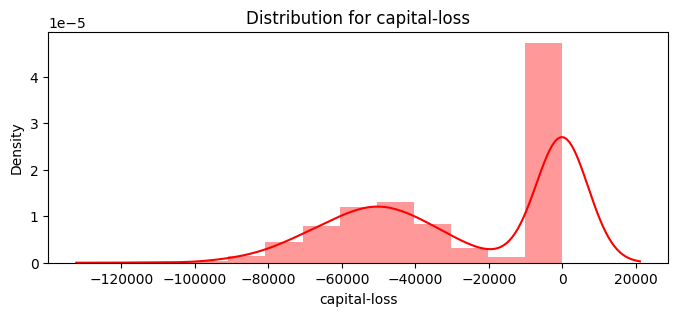

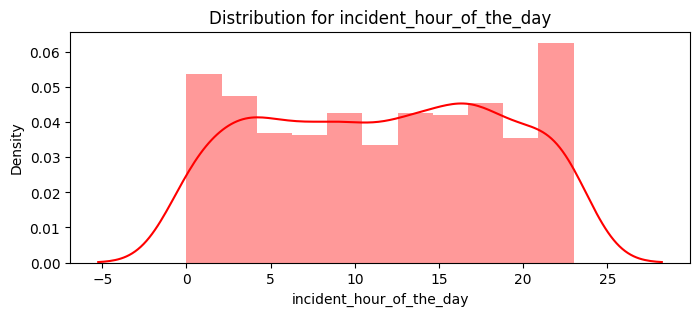

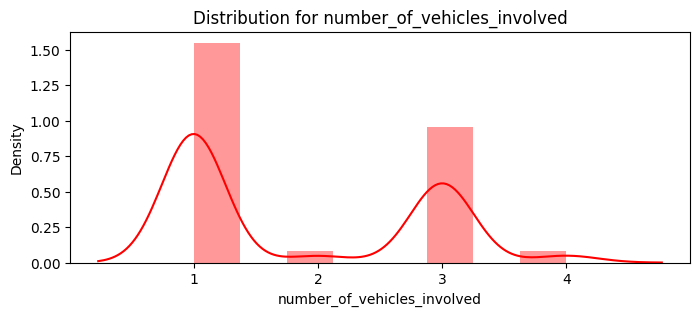

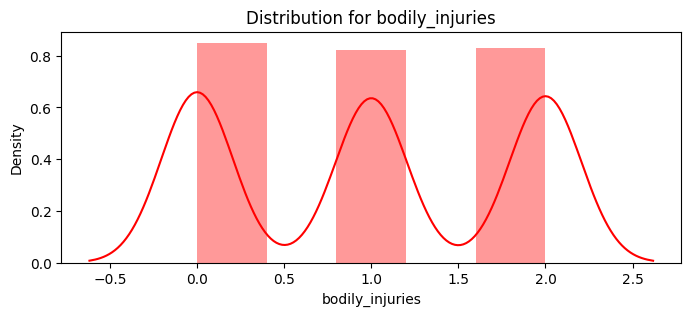

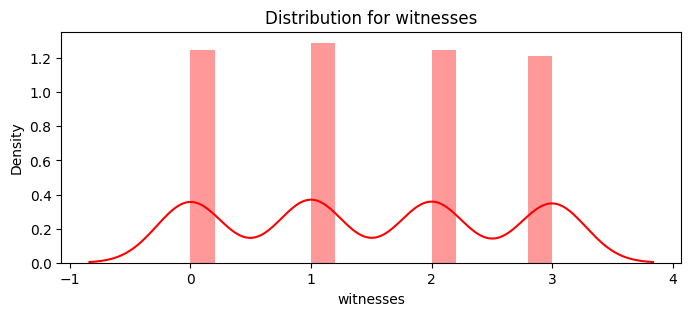

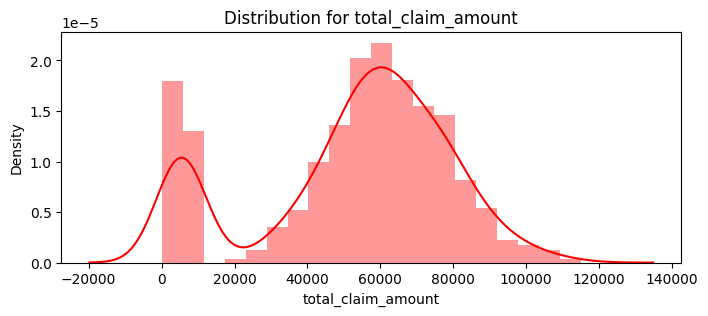

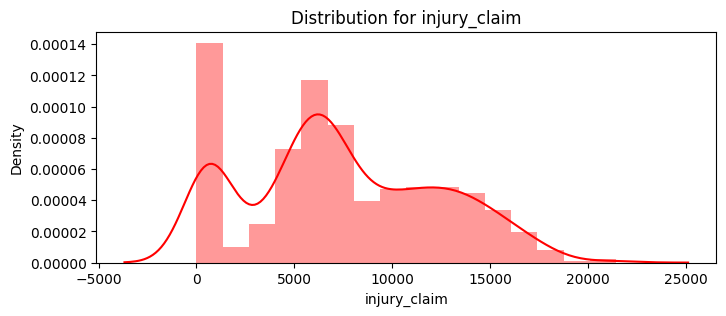

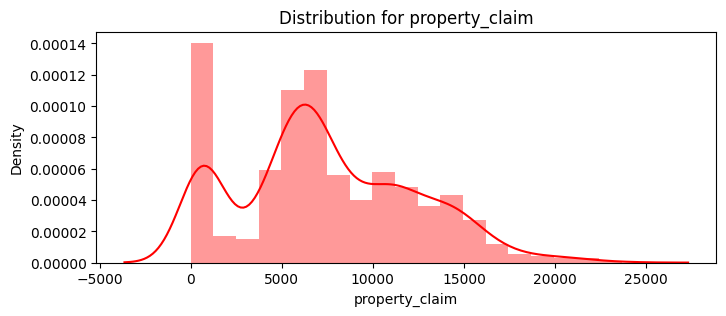

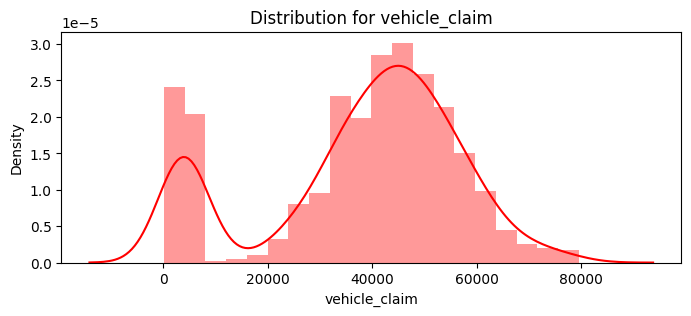

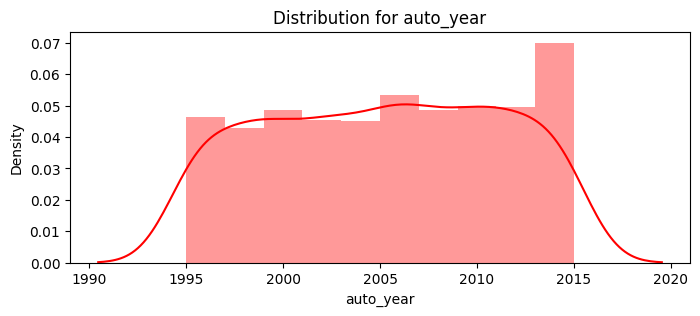

In [26]:
# 숫자형 column 목록을 추가
for numeric_col in numeric_cols:
        distplot(numeric_col, df)

- Standard Scaler 적용 (plot 시 color='c')

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df[numeric_cols]),columns=numeric_cols)
df_std

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,1.078140,0.990836,-0.095953,-0.222383,0.616705,-0.479476,-0.489529,1.011331,0.953851,-0.956261,-0.823865,0.009759,0.461838,0.714257,-0.189283,1.165505,0.749653,-0.183440
1,0.208995,0.334073,-0.791527,1.412784,-0.242521,1.697980,-0.461008,-0.901927,0.953851,-0.524475,-0.823865,-1.210174,-1.338700,-1.807312,-1.363822,-1.372696,-1.823346,0.315491
2,-0.608002,-1.088913,0.550566,1.412784,0.642233,1.697980,-0.984885,0.358023,0.953851,-0.668404,1.140056,1.229693,1.362107,-0.686362,0.054644,-0.736072,-0.785565,0.315491
3,0.452355,0.224613,-1.239334,1.412784,0.652886,2.133471,1.491682,0.853388,-1.267577,-0.956261,-0.823865,0.009759,0.461838,0.403135,-0.224130,-0.219722,0.677607,1.479664
4,0.208995,0.552994,-0.695834,-0.222383,1.341980,2.133471,1.527808,1.467210,-0.683741,1.202666,-0.823865,-1.210174,-0.438431,-1.753121,-1.257232,-1.399654,-1.768252,0.648112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.103769,1.539740,-0.222383,0.222884,-0.479476,-0.975717,-0.901927,0.953851,1.202666,-0.823865,-1.210174,-0.438431,1.305049,2.051155,0.273817,1.224309,0.149180
996,0.704407,0.224613,-1.398429,-0.222383,0.739141,-0.479476,1.492519,1.643100,0.953851,1.634452,-0.823865,1.229693,1.362107,2.111466,2.182342,2.214794,1.821868,1.645974
997,-0.642767,-0.541611,1.448920,-1.039966,0.520739,0.826998,-0.815138,0.358023,0.953851,-1.100189,1.140056,1.229693,1.362107,0.558507,0.013648,0.020826,0.771902,-1.513924
998,2.208028,2.523284,-0.047867,1.412784,0.411866,1.697980,-0.830250,-0.901927,0.953851,-1.388046,-0.823865,-1.210174,-0.438431,-0.219110,-0.453708,-0.451976,-0.073580,-1.181303


In [28]:
for numeric_col in numeric_cols:
    df[numeric_col] = scaler.fit_transform(df[numeric_cols])

C:\Users\seon\AppData\Local\Temp\ipykernel_16964\3330901477.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(frame[feature], color= color)
C:\Users\seon\AppData\Local\Temp\ipykernel_16964\3330901477.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(frame[feature], color= color)
C:

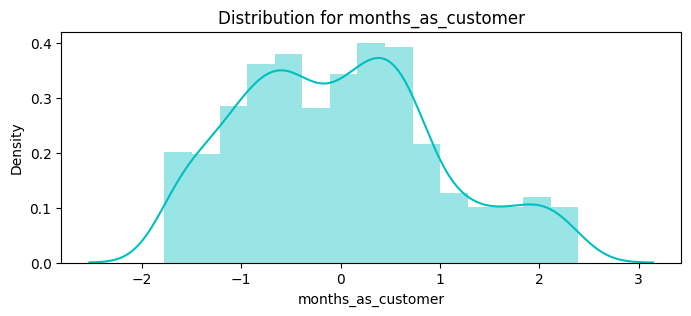

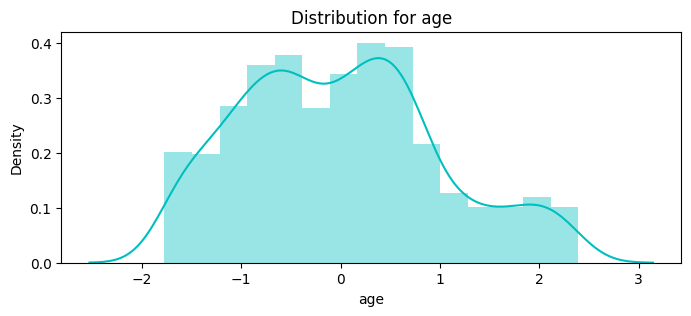

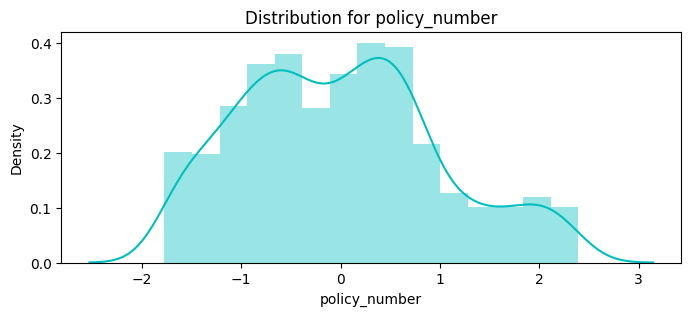

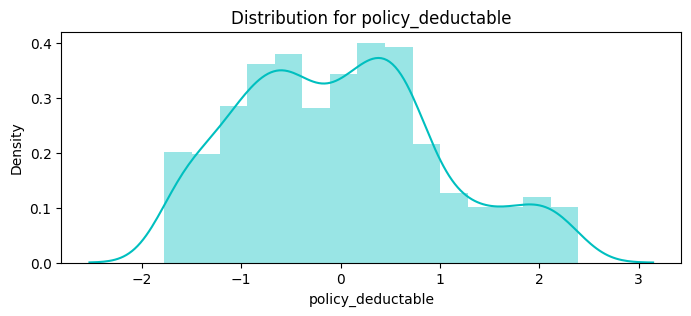

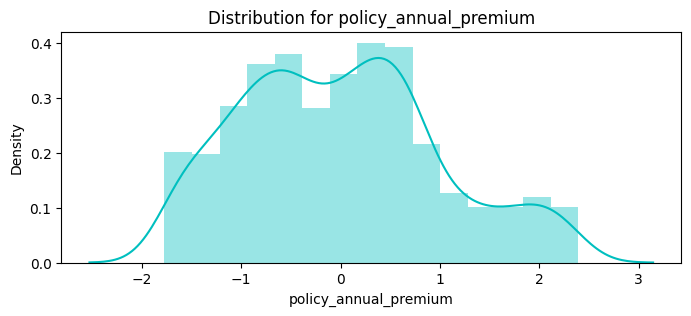

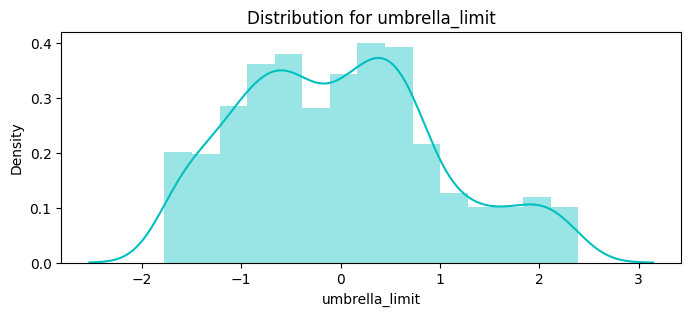

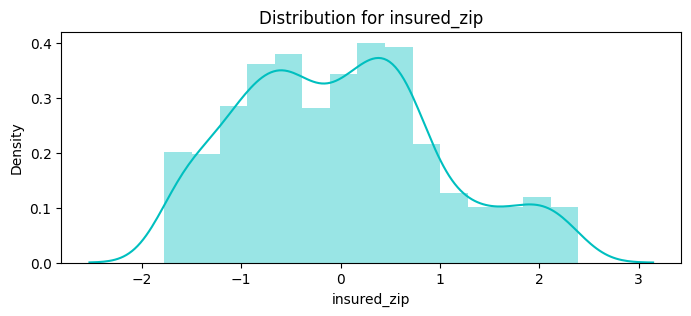

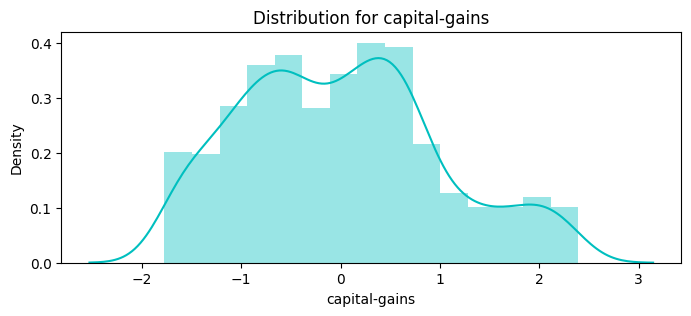

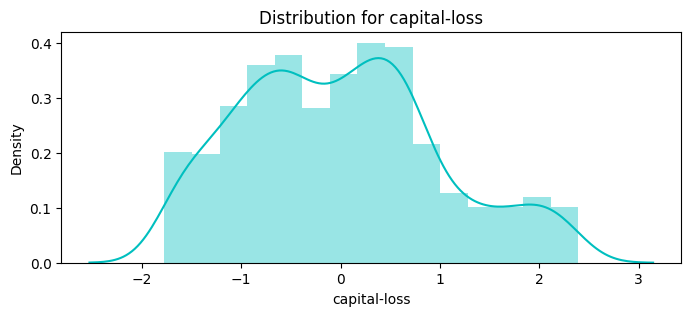

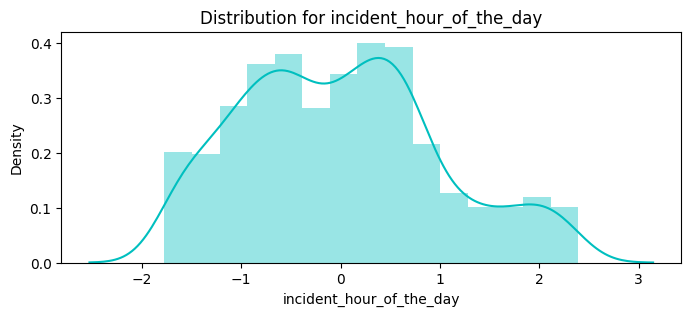

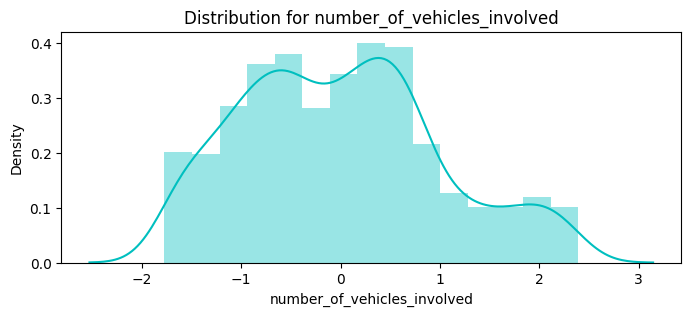

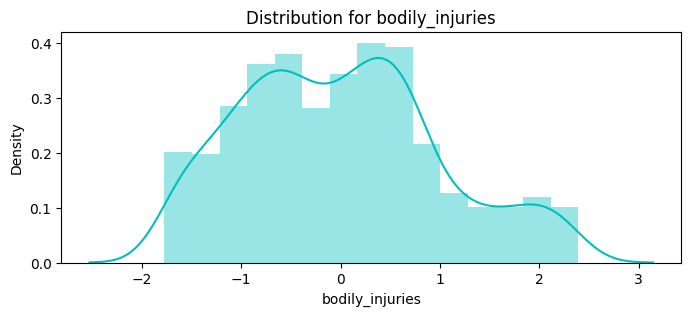

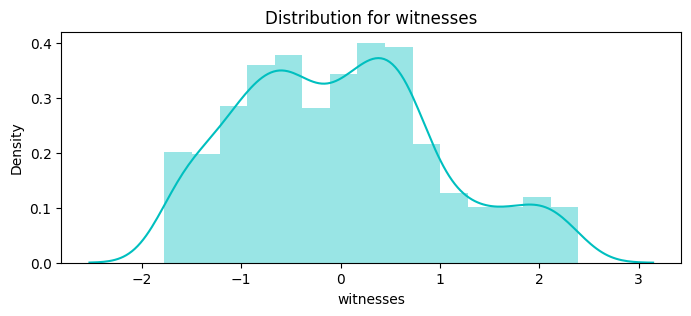

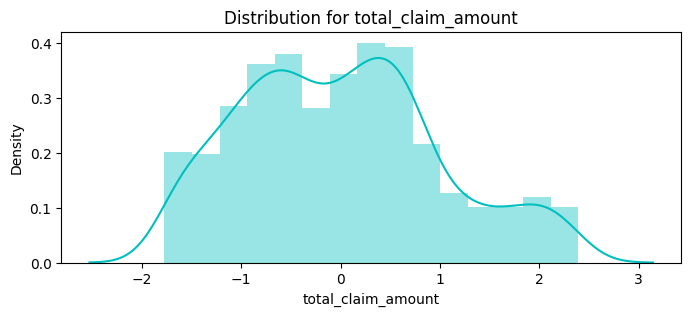

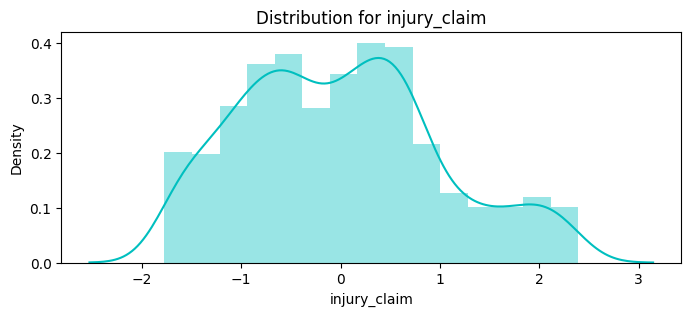

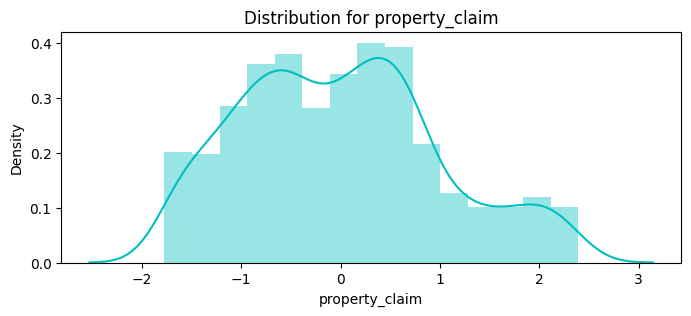

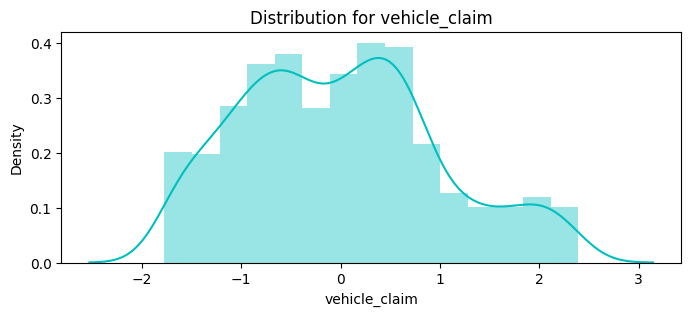

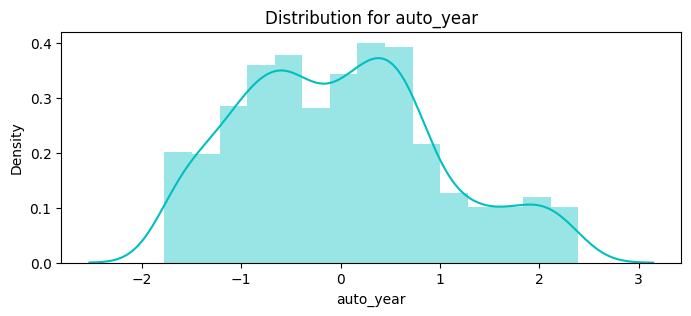

In [29]:
for numeric_col in numeric_cols:
        distplot(numeric_col, df,color='c')

## 모델링

- 학습데이터 생성 (X, y)

In [34]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [40]:
df.drop(['policy_number','insured_zip'],axis=1,inplace=True)

In [41]:
X = df.iloc[:,:36]
y = df.iloc[:,36]
X.shape, len(y)

((1000, 36), 1000)

- 학습, 테스트 데이터 분리
- 발산방지를 위해 StandardScaler 적용

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10)

- 모듈 임포트

In [44]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, classification_report

- KNN

<img src="https://wikidocs.net/images/page/32057/%EA%B7%B8%EB%A6%BC12.png" />

In [45]:
# 학습
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
kn.score(x_test,y_test)

0.69

In [46]:
# 예측, 스코어
predict_y = kn.predict(x_test)

print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test,predict_y)))
print(f"Accuracy: {accuracy_score(y_test, predict_y):.3f}") # 정확도
print(f"Precision: {precision_score(y_test, predict_y):.3f}") # 정밀도
print(f"Recall: {recall_score(y_test, predict_y):.3f}") # 재현율
print(f"F1-score: {f1_score(y_test, predict_y):.3f}") # F1 스코어

예측 정확도 : 0.6900
Accuracy: 0.690
Precision: 0.158
Recall: 0.061
F1-score: 0.088


In [47]:
confusion_matrix(y_test,predict_y)

array([[135,  16],
       [ 46,   3]], dtype=int64)

In [48]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81       151
           1       0.16      0.06      0.09        49

    accuracy                           0.69       200
   macro avg       0.45      0.48      0.45       200
weighted avg       0.60      0.69      0.64       200



- SVM

<img src="https://mblogthumb-phinf.pstatic.net/MjAxNzAzMjhfMTUz/MDAxNDkwNzEyNzc1MjU1.4uVEoab61cib-0qZb-hMSzb0OYhrB0C5Iu2czvwhJWwg.9K9Jzd5EXanL_EiRkyeQO4dVFZMUQaOn2PAnA2dNqhEg.PNG.samsjang/%EC%BA%A1%EC%B2%98.PNG?type=w2" />

In [49]:
from sklearn.svm import SVC

In [50]:
# 학습
sv = SVC()
sv.fit(x_train,y_train)
sv.score(x_test,y_test)


0.755

In [51]:
# 예측, 스코어
predict_y = sv.predict(x_test)

print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test,predict_y)))
print(f"Accuracy: {accuracy_score(y_test, predict_y):.3f}") # 정확도
print(f"Precision: {precision_score(y_test, predict_y):.3f}") # 정밀도
print(f"Recall: {recall_score(y_test, predict_y):.3f}") # 재현율
print(f"F1-score: {f1_score(y_test, predict_y):.3f}") # F1 스코어

예측 정확도 : 0.7550
Accuracy: 0.755
Precision: 0.000
Recall: 0.000
F1-score: 0.000


c:\Users\seon\.conda\envs\study\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
confusion_matrix(y_test,predict_y)

array([[151,   0],
       [ 49,   0]], dtype=int64)

In [53]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86       151
           1       0.00      0.00      0.00        49

    accuracy                           0.76       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.57      0.76      0.65       200



c:\Users\seon\.conda\envs\study\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\seon\.conda\envs\study\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\seon\.conda\envs\study\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Random Forest

<img src="https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg" />

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
# 학습
rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train, y_train)
rfc.score(x_test,y_test)

0.78

In [56]:
# 예측
predict_y = rfc.predict(x_test)

print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test,predict_y)))
print(f"Accuracy: {accuracy_score(y_test, predict_y):.3f}") # 정확도
print(f"Precision: {precision_score(y_test, predict_y):.3f}") # 정밀도
print(f"Recall: {recall_score(y_test, predict_y):.3f}") # 재현율
print(f"F1-score: {f1_score(y_test, predict_y):.3f}") # F1 스코어

예측 정확도 : 0.7800
Accuracy: 0.780
Precision: 0.600
Recall: 0.306
F1-score: 0.405


In [57]:
confusion_matrix(y_test,predict_y)

array([[141,  10],
       [ 34,  15]], dtype=int64)

In [58]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       151
           1       0.60      0.31      0.41        49

    accuracy                           0.78       200
   macro avg       0.70      0.62      0.64       200
weighted avg       0.76      0.78      0.75       200



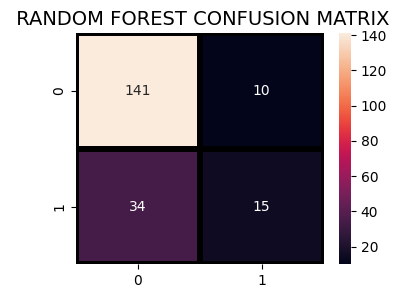

In [59]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predict_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

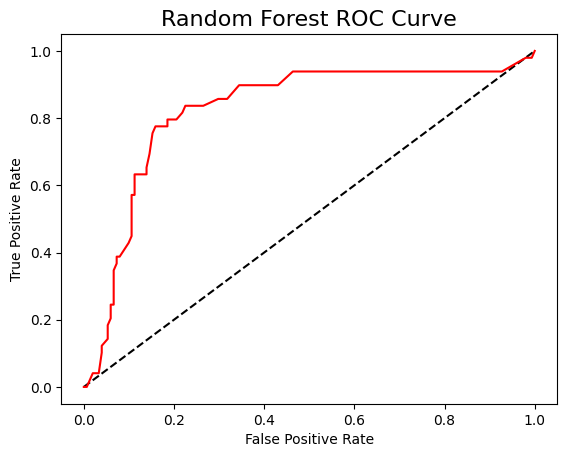

In [60]:
y_rfpred_prob = rfc.predict_proba(x_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show()

- Logistic Regression

<img src="https://velog.velcdn.com/images/73syjs/post/9ece82c2-0abb-4379-b0a7-74ed203eaf8d/image.png" />

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
# 학습
lr =LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)


c:\Users\seon\.conda\envs\study\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.78

In [63]:
# 예측
predict_y = lr.predict(x_test)

print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test,predict_y)))
print(f"Accuracy: {accuracy_score(y_test, predict_y):.3f}") # 정확도
print(f"Precision: {precision_score(y_test, predict_y):.3f}") # 정밀도
print(f"Recall: {recall_score(y_test, predict_y):.3f}") # 재현율
print(f"F1-score: {f1_score(y_test, predict_y):.3f}") # F1 스코어


예측 정확도 : 0.7800
Accuracy: 0.780
Precision: 0.647
Recall: 0.224
F1-score: 0.333


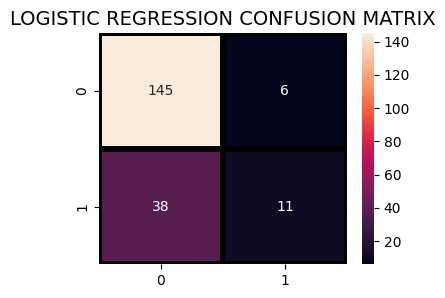

In [64]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predict_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

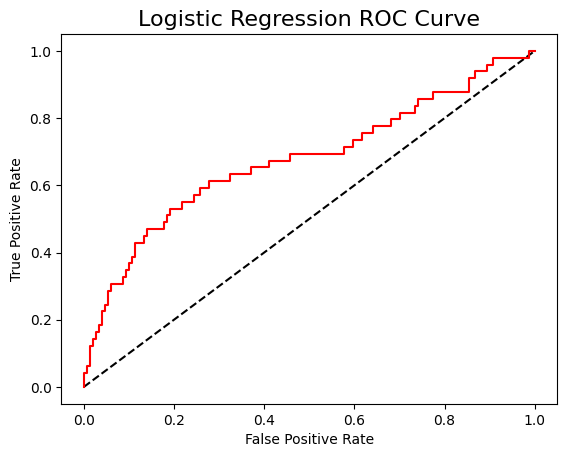

In [65]:
y_pred_prob = lr.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show()

- Decision Tree Classifier

<img src="https://bigwhalelearning.files.wordpress.com/2014/11/titanic_heuristic.png" />

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
# 학습
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.815

In [68]:
predict_y = dt.predict(x_test)

print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test,predict_y)))
print(f"Accuracy: {accuracy_score(y_test, predict_y):.3f}") # 정확도
print(f"Precision: {precision_score(y_test, predict_y):.3f}") # 정밀도
print(f"Recall: {recall_score(y_test, predict_y):.3f}") # 재현율
print(f"F1-score: {f1_score(y_test, predict_y):.3f}") # F1 스코어

예측 정확도 : 0.8150
Accuracy: 0.815
Precision: 0.650
Recall: 0.531
F1-score: 0.584


In [69]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       151
           1       0.65      0.53      0.58        49

    accuracy                           0.81       200
   macro avg       0.75      0.72      0.73       200
weighted avg       0.81      0.81      0.81       200



- Gradient Boosting Classifier

<img src="https://bradleyboehmke.github.io/HOML/images/boosted-trees-process.png" />

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
# 학습
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
print(gbc.score(x_train,y_train))
print(gbc.score(x_test,y_test))

0.96125
0.845


In [72]:
predict_y = gbc.predict(x_test)

print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test,predict_y)))
print(f"Accuracy: {accuracy_score(y_test, predict_y):.3f}") # 정확도
print(f"Precision: {precision_score(y_test, predict_y):.3f}") # 정밀도
print(f"Recall: {recall_score(y_test, predict_y):.3f}") # 재현율
print(f"F1-score: {f1_score(y_test, predict_y):.3f}") # F1 스코어

예측 정확도 : 0.8450
Accuracy: 0.845
Precision: 0.673
Recall: 0.714
F1-score: 0.693


In [73]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       151
           1       0.67      0.71      0.69        49

    accuracy                           0.84       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.85      0.84      0.85       200



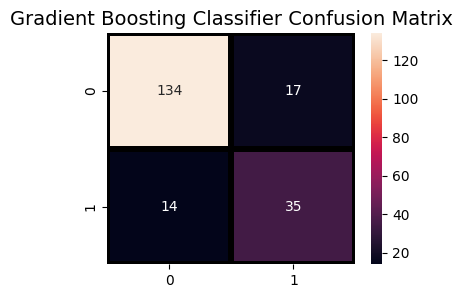

In [74]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predict_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

## 검증

- Voting Classifier

Voting을 통해 여러 모델을가지고 예측

In [75]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

In [78]:
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')

# 학습
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)
clf3.fit(x_train,y_train)
eclf1.fit(x_train,y_train)

predictions = eclf1.predict(x_test)


c:\Users\seon\.conda\envs\study\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\seon\.conda\envs\study\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

In [79]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       151
           1       0.65      0.45      0.53        49

    accuracy                           0.81       200
   macro avg       0.74      0.68      0.70       200
weighted avg       0.79      0.81      0.79       200



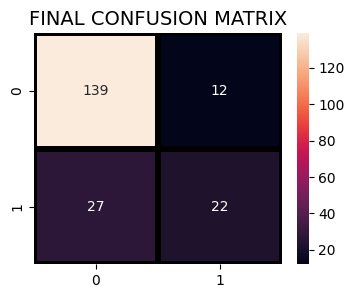

In [80]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

### 정확도

In [81]:
classifiers = [clf1, clf2,clf3,eclf1]
for classifier in classifiers:
    predictions = classifier.predict(x_test)
    print(classifier, f"Accuracy: {accuracy_score(y_test, predictions):.3f}")

GradientBoostingClassifier() Accuracy: 0.845
LogisticRegression() Accuracy: 0.780
AdaBoostClassifier() Accuracy: 0.815
VotingClassifier(estimators=[('gbc', GradientBoostingClassifier()),
                             ('lr', LogisticRegression()),
                             ('abc', AdaBoostClassifier())],
                 voting='soft') Accuracy: 0.805


### Recall

In [83]:
classifiers = [clf1, clf2,clf3,eclf1]
for classifier in classifiers:
    predictions = classifier.predict(x_test)
    print(classifier, f"recall_score: {recall_score(y_test, predictions):.3f}")

GradientBoostingClassifier() recall_score: 0.714
LogisticRegression() recall_score: 0.224
AdaBoostClassifier() recall_score: 0.510
VotingClassifier(estimators=[('gbc', GradientBoostingClassifier()),
                             ('lr', LogisticRegression()),
                             ('abc', AdaBoostClassifier())],
                 voting='soft') recall_score: 0.449
